# Exploring Life Expectancy, Aid, Health Services, and Access

Team: Andrea Pope, Dominic Delmolino, Sarah Kelley

Data came from the World Health Organization, available at http://apps.who.int/gho/data/node.main. We downloaded individual data sets for Life Expectancy, Aid, Health Services, HIV prevalances, and Acccess. 

## Imports and Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

Data Imports:

In [2]:
df_le = pd.read_csv("LifeExpectancy.csv") #various life expectancy measures
HIV = pd.read_csv("HIV.csv") #HIV prevalance
HS = pd.read_csv("health_services.csv") #Expenditures on Health Services
df_exp = pd.read_csv("access_to_water.csv") #Access to clean water and sanitation
df_c = pd.read_csv("Commitments_n_DisbursementsofAidbyCountry.csv")

## Life Expectancy Data Preparation

In [3]:
df_le.columns = ["Country; Year", "LEatBirth", "LEatBirthFem", "LEatBirthMale","LEat60", "LEat60Female", 
                 "LEat60Male","HALEatBirth","HALEatBirthFemale", "HALEatBirthMale"]
# Seperating Country from Year in initial cell to 2 separate cells
df_le['Country'], df_le['Year'] = zip(*df_le['Country; Year'].apply(lambda x: x.split('; ', 1)))

In [4]:
# convert year into date format
df_le['Year'] = pd.to_datetime(df_le['Year'], format='%Y')

In [5]:
# function to use on number fields that contain multiple answers, in order to update number fields appropriately
# data is at year level, so ints can be used (vs floats)
def clean_le(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return int(value[0:2])

In [6]:
# used to convert to float, but check for NaN values first
def clean_float(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return float(value)

In [7]:
# Clean up healthy life expectancy at birth, life expectancy at birth and at 60
df_le['HALEatBirth'] = df_le['HALEatBirth'].apply(clean_le) 
#df_le['LEatBirth'] = df_le['LEatBirth'].apply(clean_le)
#df_le['LEat60'] = df_le['LEat60'].apply(clean_le)

In [124]:
df_le_clean = pd.DataFrame({'Country': df_le.Country, 'Year': df_le.Year, "LEatBirth": df_le.LEatBirth, 
                            "LEat60": df_le.LEat60, "LEat60-Adj": df_le.LEat60 + 60,  "HALEatBirth": df_le.HALEatBirth})

In [125]:
# fully tidied up Life Expectancy Data
df_le_clean.head()

,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year
0,Afghanistan,50,16,76,61,2013-01-01
1,Afghanistan,49,16,76,60,2012-01-01
2,Afghanistan,45,15,75,55,2000-01-01
3,Afghanistan,NaN,14,74,49,1990-01-01
4,Albania,65,19,79,74,2013-01-01


In [126]:
# with numeric data columns
df_le_clean.dtypes

Country                object
HALEatBirth           float64
LEat60                  int64
LEat60-Adj              int64
LEatBirth               int64
Year           datetime64[ns]
dtype: object

In [127]:
# in a separate lab notebook, extracted data from WHO website to map Regions to Countries (through a series of WHO web pages)
# output was saved to a csv to be uploaded here, for use in broaded summarizations of the LE data
rc_map = pd.read_csv('RegionCountryMap.csv', encoding='ISO-8859-2')
#rc_map.set_index('Country', inplace=True)

In [128]:
rc_map = rc_map.drop('Unnamed: 0', axis=1)
rc_map.head()

,Country,Region
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa


In [129]:
# compare to Region / Country map to look at global trends for 2013
# merging the LE data set with the Region Country map; joining field is "Country"
df_le_clean = pd.merge(df_le_clean, rc_map, on='Country')

df_le_clean.head()

,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year,Region
0,Afghanistan,50,16,76,61,2013-01-01,Eastern Mediterranean
1,Afghanistan,49,16,76,60,2012-01-01,Eastern Mediterranean
2,Afghanistan,45,15,75,55,2000-01-01,Eastern Mediterranean
3,Afghanistan,NaN,14,74,49,1990-01-01,Eastern Mediterranean
4,Albania,65,19,79,74,2013-01-01,Europe


## Aid Disbursement Data Preparation

In [11]:
#rename columns
df_c.columns = ["Country; Year", "Commitments", "Disbursements"]

In [12]:
#split country and year
df_c['Country'], df_c['Year'] = zip(*df_c['Country; Year'].apply(lambda x: x.split('; ', 1)))

In [13]:
#make year into date format
df_c['Year'] = pd.to_datetime(df_c['Year'], format='%Y')

In [14]:
#clean up formatting
df_c['Commitments'] = df_c['Commitments'].apply(clean_float)
df_c['Disbursements'] = df_c['Disbursements'].apply(clean_float)

In [15]:
#make a frame of aid commitments by country
commitments_by_country = df_c.groupby('Country')

In [16]:
df_c.head()

,Country; Year,Commitments,Disbursements,Country,Year
0,Afghanistan; 2010,386.92,300.09,Afghanistan,2010-01-01
1,Afghanistan; 2009,254.04,345.59,Afghanistan,2009-01-01
2,Afghanistan; 2008,459.80,254.46,Afghanistan,2008-01-01
3,Afghanistan; 2007,217.22,254.40,Afghanistan,2007-01-01
4,Afghanistan; 2006,334.53,186.74,Afghanistan,2006-01-01


In [17]:
df_c.dtypes

Country; Year            object
Commitments             float64
Disbursements           float64
Country                  object
Year             datetime64[ns]
dtype: object

## Water and Sanitation Data Preparation

In [18]:
#Improve Column Names
df_exp.columns = ["Country; Year", "IWRuralPct","IWUrbanPct","IWPct", "ISRuralPct", "ISUrbanPct", "ISPct"]

In [19]:
df_exp['Country'], df_exp['Year'] = zip(*df_exp['Country; Year'].apply(lambda x: x.split('; ',1)))
df_exp['Year'] = pd.to_datetime(df_exp['Year'], format='%Y')
df_exp.drop(['Country; Year'], inplace=True, axis=1)

In [20]:
#Cleaned Up Sanitation Data Set
df_exp.head()

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct,Country,Year
0,47.0,78.2,55.3,27.0,45.1,31.9,Afghanistan,2015-01-01
1,24.3,52.2,30.3,21.3,31.2,23.4,Afghanistan,2000-01-01
2,95.2,94.9,95.1,90.2,95.5,93.2,Albania,2015-01-01
3,93.3,100.0,96.1,75.2,94.8,83.4,Albania,2000-01-01
4,NaN,100.0,NaN,68.7,94.5,78.1,Albania,1990-01-01


In [21]:
df_exp.dtypes

IWRuralPct           float64
IWUrbanPct           float64
IWPct                float64
ISRuralPct           float64
ISUrbanPct           float64
ISPct                float64
Country               object
Year          datetime64[ns]
dtype: object

## Health Services Data Preparation

In [22]:
to_drop = list(range(10,22))+ list(range(25,28))
HS = HS.drop(HS.columns[to_drop], axis=1)
HS.columns = ["Country", "Total_pct_GDP2013", "Total_pct_GDP2012", "Total_pct_GDP2000", "Govt_pct_total2013", "Govt_pct_total2012", "Govt_pct_total2000", "Pvt_pct_total2013", "Pvt_pct_total2012", "Pvt_pct_total2000", "Pocket_pct_total2013", "Pocket_pct_total2012", "Pocket_pct_total2000"]

In [23]:
HS.columns

Index(['Country', 'Total_pct_GDP2013', 'Total_pct_GDP2012',
       'Total_pct_GDP2000', 'Govt_pct_total2013', 'Govt_pct_total2012',
       'Govt_pct_total2000', 'Pvt_pct_total2013', 'Pvt_pct_total2012',
       'Pvt_pct_total2000', 'Pocket_pct_total2013', 'Pocket_pct_total2012',
       'Pocket_pct_total2000'],
      dtype='object')

In [24]:
#The challenge here is that this data is organized differently, with the years in the column headers
HS2013 = HS.ix[:,[0,1,4,7, 10]]
HS2012 = HS.ix[:,[0,2,5,8, 11]]
HS2000 = HS.ix[:,[0,3,6,9, 12]]
HS2013["Year"] = pd.Series([2013]*len(HS2013))
HS2013["Year"] = pd.to_datetime(2013, format = '%Y')
HS2012["Year"] = pd.to_datetime(2012, format = '%Y')
HS2000["Year"] = pd.to_datetime(2000, format = '%Y')

c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [25]:
HS2013.head()

,Country,Total_pct_GDP2013,Govt_pct_total2013,Pvt_pct_total2013,Pocket_pct_total2013,Year
0,Afghanistan,8.1,21.2,78.8,73.8,2013-01-01
1,Albania,5.9,48.4,51.6,51.5,2013-01-01
2,Algeria,6.6,74.2,25.8,25.1,2013-01-01
3,Andorra,8.1,75.3,24.7,18.4,2013-01-01
4,Angola,3.8,66.7,33.3,24.4,2013-01-01


In [26]:
col_names = ["Country", "Total_pct_GDP", "Govt_pct_total", "Pvt_pct_total", "Pocket_pct_total", "Year"]
HS2013.columns = col_names
HS2012.columns = col_names
HS2000.columns = col_names

In [27]:
frames = [HS2000, HS2012, HS2013]
df_hs = pd.concat(frames)

In [28]:
df_hs.head()

,Country,Total_pct_GDP,Govt_pct_total,Pvt_pct_total,Pocket_pct_total,Year
0,Afghanistan,NaN,NaN,NaN,NaN,2000-01-01
1,Albania,6.3,36.1,63.9,63.8,2000-01-01
2,Algeria,3.5,73.3,26.7,25.8,2000-01-01
3,Andorra,6.0,64.8,35.2,26.6,2000-01-01
4,Angola,3.4,49.5,50.5,36.1,2000-01-01


In [29]:
df_hs.dtypes

Country                     object
Total_pct_GDP              float64
Govt_pct_total             float64
Pvt_pct_total              float64
Pocket_pct_total           float64
Year                datetime64[ns]
dtype: object

In [30]:
len(df_hs)

573

## HIV Data Cleaning

In [31]:
#removes the ranges and > or < to make clean numbers
variables = list(HIV.columns.values)
for item in variables[1:]: 
    HIV[item] = HIV[item].map(lambda x: x.lstrip('<'))
    HIV[item] = HIV[item].map(lambda x: x[0:3])
HIV = HIV.replace("No ", np.nan)

In [32]:
#makes all of these into floats
HIV.HIV2013 = pd.to_numeric(HIV.HIV2013)
HIV.HIV2009 = pd.to_numeric(HIV.HIV2009)
HIV.HIV2005 = pd.to_numeric(HIV.HIV2005)
HIV.HIV2001 = pd.to_numeric(HIV.HIV2001)

In [33]:
HIV.head()

,Country,HIV2013,HIV2009,HIV2005,HIV2001
0,Afghanistan,0.1,0.1,0.1,0.1
1,Albania,0.1,0.1,0.1,0.1
2,Algeria,0.1,0.1,0.1,0.1
3,Angola,2.4,2.1,1.9,1.8
4,Argentina,NaN,NaN,NaN,NaN


In [34]:
HIV2001 = HIV.ix[:,[0,4]]
HIV2005 = HIV.ix[:,[0,3]]
HIV2009 = HIV.ix[:,[0,2]]
HIV2013 = HIV.ix[:,[0,1]]
HIV2001["Year"] = pd.to_datetime(2001, format = '%Y')
HIV2005["Year"] = pd.to_datetime(2005, format = '%Y')
HIV2009["Year"] = pd.to_datetime(2009, format = '%Y')
HIV2013["Year"] = pd.to_datetime(2013, format = '%Y')

c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [35]:
HIV2001.columns = ["Country", "HIV_Rate", "Year"]
HIV2005.columns = ["Country", "HIV_Rate", "Year"]
HIV2009.columns = ["Country", "HIV_Rate", "Year"]
HIV2013.columns = ["Country", "HIV_Rate", "Year"]

In [36]:
frames = [HIV2001, HIV2005, HIV2009, HIV2013]
df_HIV = pd.concat(frames)

In [37]:
df_HIV.head()

,Country,HIV_Rate,Year
0,Afghanistan,0.1,2001-01-01
1,Albania,0.1,2001-01-01
2,Algeria,0.1,2001-01-01
3,Angola,1.8,2001-01-01
4,Argentina,NaN,2001-01-01


In [38]:
df_HIV.dtypes

Country             object
HIV_Rate           float64
Year        datetime64[ns]
dtype: object

In [39]:
len(df_HIV)

632

In [40]:
# Keeping alternate form for easier analyis of change over time. 
HIV.head()

,Country,HIV2013,HIV2009,HIV2005,HIV2001
0,Afghanistan,0.1,0.1,0.1,0.1
1,Albania,0.1,0.1,0.1,0.1
2,Algeria,0.1,0.1,0.1,0.1
3,Angola,2.4,2.1,1.9,1.8
4,Argentina,NaN,NaN,NaN,NaN


## Life Expectancy Data Exploration

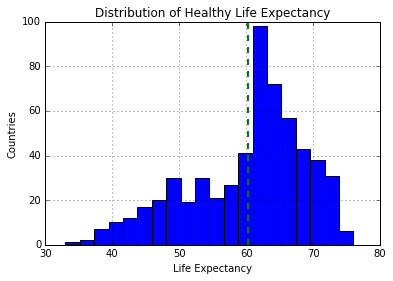

In [92]:
#historgram of HALE
df_le_clean.hist('HALEatBirth', bins = 20)
pyplot.ylabel("Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Healthy Life Expectancy")
pyplot.axvline(df_le_clean['HALEatBirth'].mean(), color='g', linestyle='dashed', linewidth=2)

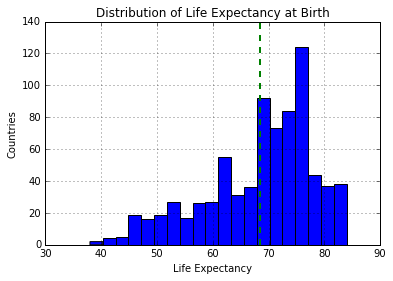

In [93]:
#histogram of Life Expectanct at Birth
df_le_clean.hist('LEatBirth', bins = 20)
pyplot.ylabel("Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Life Expectancy at Birth")
pyplot.axvline(df_le_clean['LEatBirth'].mean(), color='g', linestyle='dashed', linewidth=2)

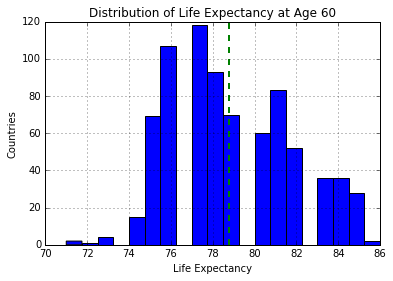

In [94]:
#histogram of Life Expectanct at 60 - using adjusted values to represent total age
df_le_clean.hist('LEat60-Adj', bins = 20)
pyplot.ylabel("Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Life Expectancy at Age 60")
pyplot.axvline(df_le_clean['LEat60-Adj'].mean(), color='g', linestyle='dashed', linewidth=2)

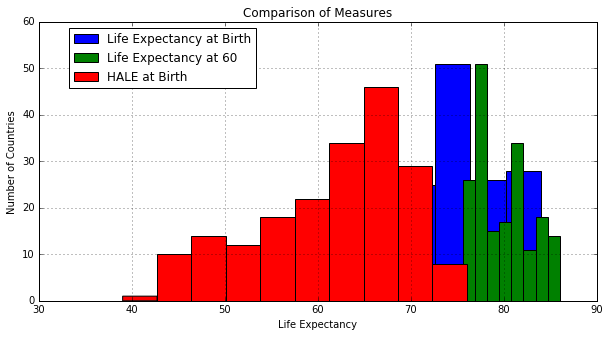

In [95]:
#compare all 3 on 1 graph
df_le_clean[df_le_clean.Year=='2013-01-01'].LEatBirth.hist(label = "Life Expectancy at Birth", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2013-01-01']['LEat60-Adj'].hist(label = "Life Expectancy at 60", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2013-01-01']['HALEatBirth'].hist(label = "HALE at Birth", figsize = (10,5))
pyplot.title ("Comparison of Measures")
pyplot.xlabel("Life Expectancy")
pyplot.ylabel("Number of Countries")
pyplot.legend(bbox_to_anchor=(.4, 1))

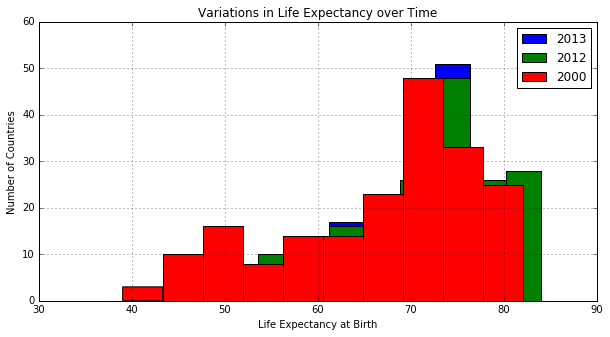

In [96]:
# look in variations over time for LEatBirth
df_le_clean[df_le_clean.Year=='2013-01-01'].LEatBirth.hist(label = "2013", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2012-01-01'].LEatBirth.hist(label = "2012", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2000-01-01'].LEatBirth.hist(label = '2000', figsize = (10,5))
pyplot.title ("Variations in Life Expectancy over Time")
pyplot.xlabel("Life Expectancy at Birth")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [97]:
#creating a list of bins to group the year data
ranges = [0, 49, 54, 59, 64, 69, 74, 79, 150]
labels = ['Under 50','50-55','55-60','60-65', '65-70', '70-75', '75-80', 'Over 80']
df_le_clean['LEB'] = pd.cut(df_le_clean['LEatBirth'], ranges, labels=labels).astype('category')
df_le_clean['LE60-Adj'] = pd.cut(df_le_clean['LEat60-Adj'], ranges, labels=labels).astype('category')
df_le_clean['HALE'] = pd.cut(df_le_clean['HALEatBirth'], ranges, labels=labels).astype('category')

In [98]:
df_le_clean[['LEB', 'LE60-Adj', 'HALE']].describe()


,LEB,LE60-Adj,HALE
count,776,776,582
unique,8,3,7
top,70-75,75-80,60-65
freq,190,457,157


In [99]:
df_le_clean['LEB'].value_counts()

70-75       190
75-80       168
65-70       108
60-65        82
Over 80      75
55-60        61
50-55        46
Under 50     46
dtype: int64

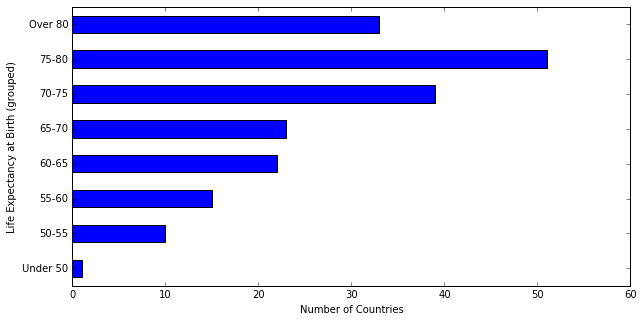

In [100]:
#Look ar records from 2013
df_le_2013 = df_le_clean[df_le_clean['Year'] == '2013-01-01']
df_le_2013.groupby(['LEB'])['Country'].count().plot(kind='barh', figsize=(10,5))
pyplot.xlabel("Number of Countries")
pyplot.ylabel("Life Expectancy at Birth (grouped)")

In [101]:
#group by country
le_by_country = df_le_clean.groupby('Country')

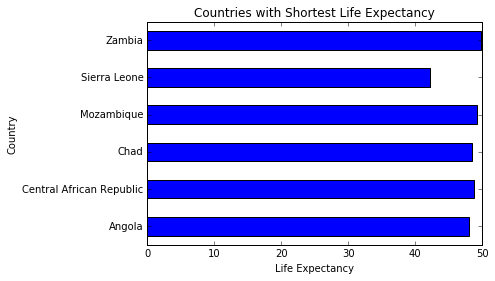

In [102]:
#Countries with the shortest life expectancy
le_by_country['LEatBirth'].mean()[le_by_country['LEatBirth'].mean()<50].plot(kind='barh')
pyplot.xlabel("Life Expectancy")
pyplot.title("Countries with Shortest Life Expectancy")

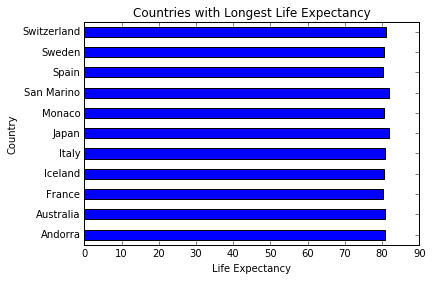

In [103]:
#countries with the highest Life Expectancies
le_by_country['LEatBirth'].mean()[le_by_country['LEatBirth'].mean()>80].plot(kind='barh')
pyplot.xlabel("Life Expectancy")
pyplot.title("Countries with Longest Life Expectancy")

In [104]:
# look at countries with largest difference b/t LEatBirth and LEat60 (using median values across years of data)
le_variance = abs(le_by_country['LEatBirth'].median() - (le_by_country['LEat60'].median() + 60)).sort_values(ascending=False)
le_variance.head(10)

Country
Sierra Leone                        29.5
Angola                              27.0
Zambia                              26.0
Central African Republic            26.0
Chad                                26.0
Lesotho                             26.0
Mozambique                          25.5
Nigeria                             25.0
Democratic Republic of the Congo    24.5
Somalia                             24.0
dtype: float64

In [140]:
?df_le_clean.plot()

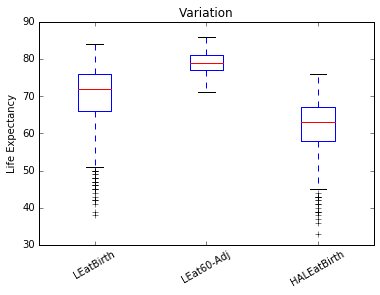

In [151]:
#stats = ['LEatBirth', 'LEat60-Adj', 'HALEatBirth']
df_le_clean[['LEatBirth', 'LEat60-Adj', 'HALEatBirth']].plot(kind='box', return_type='axes', rot=30)
pyplot.title ("Variation")
pyplot.ylabel("Life Expectancy")

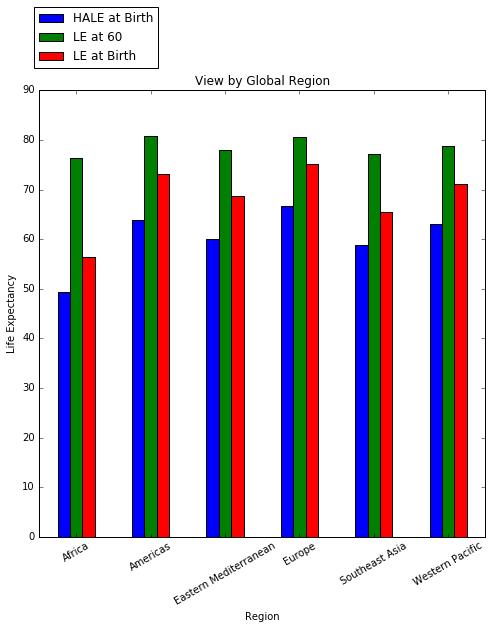

In [161]:
# look at spread by global region
df_le_clean.groupby('Region')[['HALEatBirth', 'LEat60-Adj', 'LEatBirth']].mean().plot(kind = 'bar', figsize = (8,8), rot=30)
pyplot.title ("View by Global Region")
pyplot.ylabel("Life Expectancy")
pyplot.legend(["HALE at Birth", 'LE at 60', 'LE at Birth'], bbox_to_anchor=(.28, 1.2))


## Aid Exploration

In [ ]:
commitments_by_country['Commitments'].mean().hist()
pyplot.xlabel("Millions of US Dollars Committed")
pyplot.title("Distribution of Aid Committed, in US Millions")

In [ ]:
commitments_by_country['Commitments'].mean()[commitments_by_country['Commitments'].mean()>250].plot(kind='barh')
pyplot.title("Countries with Highest Aid Reciepts")
pyplot.xlabel("Millions of Dollars Committed to Country")

## Water and Santiation Exploration

In [ ]:
# Histograms by year for Rural access to water
df_exp[df_exp.Year=='1990'].IWRuralPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWRuralPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWRuralPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Rural Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [ ]:
# Histograms by year for Urban access to water
df_exp[df_exp.Year=='1990'].IWUrbanPct.plot(figsize=(7,7), kind="hist", bins=13, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWUrbanPct.plot(kind="hist", bins=13, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWUrbanPct.plot(kind="hist", bins=13, label="2015", grid=True)
pyplot.title("Urban Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [ ]:
# Histograms by year for Overall access to water
df_exp[df_exp.Year=='1990'].IWPct.plot(figsize=(7,7), kind="hist", bins=15, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWPct.plot(kind="hist", bins=15, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWPct.plot(kind="hist", bins=15, label="2015", grid=True)
pyplot.title("Overall Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [ ]:
# Histograms by year for total access to sanitation
df_exp[df_exp.Year=='1990'].ISPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].ISPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].ISPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Overall Access to Sanitation")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [ ]:
# Countries with lowest combined rural access to water & sanitation
exp_by_country = df_exp.groupby('Country')
exp_by_country.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) < 50]

In [ ]:
exp_by_country.IWRuralPct.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) < 50].plot(legend = True, label = "Clean Water", kind = "barh")
exp_by_country.ISRuralPct.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) < 50].plot(legend = True, label = "Sanitation", color = "g", kind = "barh")
pyplot.title("Rural Access to Clean water and Sanitation in Countries with Least Access ")
pyplot.xlabel("Percent of Rural Population with Access")

# Comparing Access to Water and Sanitation against Life Expectancy

In [ ]:
# Function to make 2013 data look like 2015 data so we can join 2015 to 2015 data
from datetime import datetime
def push2015(value):
    if value == datetime.strptime('2013','%Y'):
        return datetime.strptime('2015','%Y')
    else:
        return value

In [ ]:
df_le_clean_w = df_le_clean

In [ ]:
df_le_clean_w['Year'] = df_le_clean_w['Year'].apply(push2015)

In [ ]:
# We don't have water data for 2012, so remove it from our comparison set
df_le_clean_w = df_le_clean_w[df_le_clean_w.Year != '2012']

In [ ]:
# Merge (Join) Life Expectancy and Water data
df_le_exp = pd.merge(df_le_clean_w, df_exp)

In [ ]:
# Only look at countries where we have 3 years of samples in both LE and Water
df3 = df_le_exp['Country'].groupby(df_le_exp['Country']).count()
df3 = df3.to_frame()
df3.columns = ['Count']
df3.reset_index(level=0, inplace=True)
df3 = df3[df3.Count == 3]
df3_le_exp = pd.merge(df_le_exp, df3)

In [ ]:
# Examine correlations between Water/Sanitation Access and Life Expectancy
df3_le_exp_corr = df3_le_exp.corr()
df3_le_exp_corr = df3_le_exp_corr[['IWRuralPct','IWUrbanPct','IWPct','ISRuralPct','ISUrbanPct','ISPct']]
df3_le_exp_corr.loc[:'LEatBirth']

## Health Services Data Exploration

In [ ]:
df_hs.head()

In [ ]:
df_hs.Total_pct_GDP[df_hs.Year =='2013'].hist()
pyplot.xlabel("Percent of GDP spent on Health, 2013")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Total Health Expenditures as a Percent of GDP")
pyplot.axvline(HS["Total_pct_GDP2013"].mean(), color='c', linestyle='dashed', linewidth=2)

In [ ]:
df_hs.Total_pct_GDP[df_hs.Year =='2000'].hist()
pyplot.xlabel("Percent of GDP spent on Health, 2000")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Total Health Expenditures as a Percent of GDP")
pyplot.axvline(HS["Total_pct_GDP2000"].mean(), color='c', linestyle='dashed', linewidth=2)

In [ ]:
# All of the countries with government expeditures 2 or more standard deviations above the mean
hs_2013 = df_hs[df_hs.Year =='2013']
cut_off = hs_2013.Total_pct_GDP.mean() + 2*hs_2013.Total_pct_GDP.std() 
cut_off
hs_2013_subset = hs_2013[hs_2013.Total_pct_GDP >= cut_off]
hs_2013_subset.set_index("Country", inplace = True)
hs_2013_subset.Total_pct_GDP.plot(kind = "barh")
pyplot.title("Countries with Overall Expeditures(% of GDP) 2 Standard Deviations above the Mean")
pyplot.xlabel("Percent of GDP spent on Health")

## HIV Prevalance Exploration

In [ ]:
df_HIV.HIV_Rate[df_HIV.Year == "2013"].hist(bins = 30, color = 'c')
pyplot.xlabel("HIV Prevalance, 2013")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of HIV Prevalances, 2013")
pyplot.axvline(HIV.HIV2013.mean(), color='b', linestyle='dashed', linewidth=2)

In [ ]:
df_HIV.HIV_Rate[df_HIV.Year == "2001"].hist(bins = 30, color = 'g')
pyplot.xlabel("HIV Prevalance, 2001")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of HIV Prevalances, 2001")
pyplot.axvline(HIV.HIV2013.mean(), color='b', linestyle='dashed', linewidth=2)

In [ ]:
# All of the countries with HIV rates over 10%
hiv_2013 = df_HIV[df_HIV.Year =='2013']
hiv_2013_subset = hiv_2013[hiv_2013.HIV_Rate >= 10]
high_HIV_countries = hiv_2013_subset.Country
hiv_2013_subset.set_index("Country", inplace = True)
hiv_2013_subset.HIV_Rate.plot(kind = "barh")
pyplot.title("Countries with HIV Prevalances of more than 10% in 2013")
pyplot.xlabel("Percent of population with HIV")

In [ ]:
#Change in HIV prevalances between 2001 and 2013
HIV["Increase"] = HIV["HIV2013"] - HIV["HIV2001"]
HIV.Increase.hist(bins = 20)
pyplot.xlabel("Change in HIV Prevalance")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Change in HIV Prevalances, 2001-2013")
pyplot.axvline(HIV.Increase.mean(), color='c', linestyle='dashed', linewidth=2)

In [ ]:
# Current HIV Rate of all of the countries who have decreased thier HIV rate by more than 2%
HIV_decrease = HIV[HIV.Increase <= -2]
HIV_decrease.set_index("Country", inplace = True)
HIV_decrease.HIV2013.plot(kind = "barh", color = 'r')
pyplot.title("HIV Prevalance in Countries in which HIV Rate has Fallen by 2% or More 2001-2013")
pyplot.xlabel("Percent of population with HIV")

In [ ]:
#HIV Rate over time in countries with high HIV prevalence
cols = ["Country","HIV2001", "HIV2005", "HIV2009", "HIV2013"]
HIV_ordered = HIV[cols]
HIV_ordered.columns = ["Country", "2001", "2005", "2009", "2013"]
highHIV = HIV_ordered[HIV_ordered["2013"] >10]
highHIV.set_index("Country", inplace = True)
highHIV_flipped = highHIV.T
highHIV_flipped.plot( figsize = (10,10))
pyplot.title("Changes over time in HIV Prevalance in Countries with High HIV Rates")
pyplot.ylabel("HIV Prevalance (%)")